In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [52]:
da = pd.read_csv("dataset_uas.csv")
da.head()

,kode,daerah,tahun,jumlahdesa,provinsi,dum_prov,danadesa,ipm,orangmiskin,regional,region,tani,growth
0,1,Aceh Barat,2015,322,Aceh,12,13285497.0,68.41,41.36,Sumatera,2,1603.93,4.58
1,1,Aceh Barat,2016,322,Aceh,12,189083713.0,69.26,40.11,Sumatera,2,1698.99,2.92
2,1,Aceh Barat,2017,322,Aceh,12,240736847.0,70.20,40.72,Sumatera,2,1765.48,13.15
3,2,Aceh Barat Daya,2016,132,Aceh,12,80000245.0,64.57,25.73,Sumatera,2,753.69,4.56
4,2,Aceh Barat Daya,2015,152,Aceh,12,7096601.0,63.77,25.93,Sumatera,2,714.90,3.34


In [53]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 13 columns):
kode           1188 non-null int64
daerah         1188 non-null object
tahun          1188 non-null int64
jumlahdesa     1188 non-null int64
provinsi       1188 non-null object
dum_prov       1188 non-null int64
danadesa       1188 non-null float64
ipm            1188 non-null float64
orangmiskin    1188 non-null float64
regional       1188 non-null object
region         1188 non-null int64
tani           1188 non-null float64
growth         1188 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 120.7+ KB


In [54]:
da.describe()

,kode,tahun,jumlahdesa,dum_prov,danadesa,ipm,orangmiskin,region,tani,growth
count,1188.000000,1188.00000,1188.000000,1188.00000,1.188000e+03,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,198.500000,2016.00000,177.560606,15.00000,9.290310e+07,66.203788,62.841532,1.742424,2792.913636,5.556355
std,114.363132,0.81684,115.625943,10.01002,9.666091e+07,5.687887,68.428329,1.312625,2888.542546,4.629278
min,1.000000,2015.00000,12.000000,0.00000,1.000000e+00,39.410000,1.380000,0.000000,46.170000,-20.340000
25%,99.750000,2015.00000,92.000000,6.00000,2.578246e+07,63.990000,18.032500,1.000000,797.617500,4.860000
50%,198.500000,2016.00000,152.000000,12.00000,6.935284e+07,66.705000,33.510000,2.000000,1981.905000,5.330000
75%,297.250000,2017.00000,240.000000,24.00000,1.313199e+08,69.292500,83.997500,3.000000,3681.832500,6.100000
max,396.000000,2017.00000,852.000000,32.00000,1.745276e+09,83.950000,490.800000,4.000000,20072.100000,107.070000


In [55]:
da["log_miskin"] = np.log(da["orangmiskin"])
da["log_pdrbtani"] = np.log(da["tani"])
da["log_ipm"] = np.log(da["ipm"])
da["log_dd"] = np.log(da["danadesa"])
da["log_growth"] = np.log(da["growth"])
da["logddpermis"] = np.log(da["danadesa"] / da["orangmiskin"])
da["logddperdesa"] = np.log(da["danadesa"] / da["jumlahdesa"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [56]:
da.to_csv("database.csv")

In [57]:
t2017 = da.loc[da["tahun"] == 2017]
t2017.tail()

,kode,daerah,tahun,jumlahdesa,provinsi,dum_prov,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth,logddpermis,logddperdesa
1175,392,Way Kanan,2017,221,Lampung,23,174760346.0,65.97,123.04,Sumatera,2,3135.54,5.11,4.812510,8.050557,4.189200,18.978926,1.631199,14.166417,13.580763
1178,393,Wonogiri,2017,251,Jawa Tengah,0,198745821.0,68.66,123.04,Jawa-Bali,1,5748.46,5.17,4.812510,8.656687,4.229167,19.107537,1.642873,14.295028,13.582084
1181,394,Wonosobo,2017,236,Jawa Tengah,0,191496626.0,66.89,159.16,Jawa-Bali,1,3766.63,3.16,5.069910,8.233936,4.203049,19.070381,1.150572,14.000471,13.606549
1184,395,Yahukimo,2017,510,Papua,10,384055245.0,47.95,73.27,Timur,0,327.56,6.85,4.294151,5.791671,3.870159,19.766297,1.924249,15.472146,13.531886
1187,396,Yalimo,2017,300,Papua,10,230607728.0,46.19,21.18,Timur,0,184.96,5.19,3.053057,5.220140,3.832763,19.256229,1.646734,16.203171,13.552446


In [58]:
t2016 = da.loc[da["tahun"]==2016]
t2016.tail()

,kode,daerah,tahun,jumlahdesa,provinsi,dum_prov,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth,logddpermis,logddperdesa
1174,392,Way Kanan,2016,221,Lampung,23,137172112.0,65.74,63.64,Sumatera,2,3067.92,5.12,4.153242,8.028755,4.185708,18.736747,1.633154,14.583505,13.338584
1177,393,Wonogiri,2016,251,Jawa Tengah,0,155565696.0,68.23,124.83,Jawa-Bali,1,5654.17,5.23,4.826953,8.640149,4.222884,18.862579,1.654411,14.035626,13.337126
1180,394,Wonosobo,2016,236,Jawa Tengah,0,150053467.0,66.19,160.12,Jawa-Bali,1,3810.80,5.13,5.075924,8.245594,4.192529,18.826502,1.635106,13.750579,13.362670
1183,395,Yahukimo,2016,510,Papua,10,300500872.0,47.13,74.54,Timur,0,323.85,5.20,4.311336,5.780280,3.852910,19.520961,1.648659,15.209625,13.286550
1186,396,Yalimo,2016,300,Papua,10,181971341.0,44.95,21.36,Timur,0,178.99,6.83,3.061520,5.187330,3.805551,19.019360,1.921325,15.957840,13.315577


In [59]:
t2015 = da.loc[da["tahun"]==2015]
t2015.tail()

,kode,daerah,tahun,jumlahdesa,provinsi,dum_prov,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth,logddpermis,logddperdesa
1173,392,Way Kanan,2015,221,Lampung,23,25698546.0,65.18,63.09,Sumatera,2,2952.49,5.27,4.144562,7.990404,4.177153,17.061945,1.662030,12.917383,11.663782
1176,393,Wonogiri,2015,251,Jawa Tengah,0,34253793.0,67.76,122.98,Jawa-Bali,1,5477.07,5.40,4.812022,8.608326,4.215972,17.349308,1.686399,12.537286,11.823855
1179,394,Wonosobo,2015,236,Jawa Tengah,0,32206754.0,65.70,166.41,Jawa-Bali,1,3617.58,4.67,5.114455,8.193561,4.185099,17.287687,1.541159,12.173232,11.823855
1182,395,Yahukimo,2015,510,Papua,10,125597209.0,46.63,74.37,Timur,0,324.76,7.14,4.309053,5.783086,3.842244,18.648591,1.965713,14.339538,12.414180
1185,396,Yalimo,2015,300,Papua,10,73880711.0,44.32,21.36,Timur,0,174.16,8.88,3.061520,5.159974,3.791436,18.117962,2.183802,15.056442,12.414180


In [60]:
t2017.describe()

,kode,tahun,jumlahdesa,dum_prov,danadesa,ipm,orangmiskin,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth,logddpermis,logddperdesa
count,396.0000,396.0,396.000000,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,391.000000,396.000000,396.000000
mean,198.5000,2017.0,177.664141,15.000000,1.413056e+08,66.790859,67.695480,1.742424,2926.476035,5.444747,3.696230,7.490791,4.197714,18.525987,1.668106,14.829757,13.560551
std,114.4596,0.0,115.768870,10.018464,9.053320e+07,5.592257,69.770299,1.313732,3074.575594,2.709440,1.072009,1.059156,0.090323,0.867761,0.322077,1.144054,0.611972
min,1.0000,2017.0,14.000000,0.000000,1.260921e+05,41.060000,2.460000,0.000000,47.990000,-18.970000,0.900161,3.870993,3.715034,11.744768,-0.139262,7.220763,6.627564
25%,99.7500,2017.0,92.750000,6.000000,7.592591e+07,64.542500,19.200000,1.000000,825.277500,5.000000,2.954910,6.715720,4.167324,18.145264,1.611436,14.196547,13.566919
50%,198.5000,2017.0,152.000000,12.000000,1.175163e+08,67.275000,36.655000,2.000000,2065.755000,5.350000,3.601550,7.633240,4.208789,18.582087,1.678964,14.792237,13.593785
75%,297.2500,2017.0,239.250000,24.000000,1.912928e+08,70.035000,98.732500,3.000000,3797.675000,6.055000,4.592413,8.242140,4.248995,19.069316,1.804182,15.586953,13.634409
max,396.0000,2017.0,852.000000,32.000000,6.353144e+08,83.950000,487.280000,4.000000,20072.100000,40.470000,6.188839,9.907086,4.430221,20.269631,3.700561,18.415604,14.600068


In [61]:
t2016.describe()

,kode,tahun,jumlahdesa,dum_prov,danadesa,ipm,orangmiskin,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth,logddpermis,logddperdesa
count,396.0000,396.0,396.00000,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,387.000000,396.000000,396.000000
mean,198.5000,2016.0,177.35101,15.000000,1.155988e+08,66.222778,59.702323,1.742424,2780.329470,5.496313,3.559505,7.448784,4.188935,18.342124,1.644062,14.782619,13.379772
std,114.4596,0.0,115.62712,10.018464,1.076500e+08,5.693643,66.710559,1.313732,2845.773912,3.215247,1.056362,1.052402,0.093250,0.667942,0.489615,0.792498,0.171156
min,1.0000,2016.0,12.00000,0.000000,1.024191e+07,39.960000,1.410000,0.000000,47.170000,-4.960000,0.343590,3.853758,3.687879,16.141999,-2.813411,12.801993,12.672922
25%,99.7500,2016.0,92.00000,6.000000,6.057888e+07,63.980000,17.477500,1.000000,791.302500,4.837500,2.860914,6.673680,4.158571,17.919457,1.597363,14.170146,13.326531
50%,198.5000,2016.0,151.00000,12.000000,9.316142e+07,66.695000,31.595000,2.000000,1984.340000,5.280000,3.452997,7.593041,4.200130,18.349844,1.665818,14.701007,13.352554
75%,297.2500,2016.0,240.25000,24.000000,1.502777e+08,69.302500,80.390000,3.000000,3655.090000,6.050000,4.386887,8.203874,4.238481,18.827992,1.801710,15.352346,13.392329
max,396.0000,2016.0,852.00000,32.000000,1.745276e+09,83.730000,490.800000,4.000000,18640.160000,38.600000,6.196037,9.833074,4.427597,21.280178,3.653252,17.402453,15.928320


In [62]:
t2015.describe()

,kode,tahun,jumlahdesa,dum_prov,danadesa,ipm,orangmiskin,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth,logddpermis,logddperdesa
count,396.0000,396.0,396.000000,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,386.000000,396.000000,396.000000
mean,198.5000,2015.0,177.666667,15.000000,2.180493e+07,65.597727,61.126793,1.742424,2671.935404,5.728005,3.578512,7.409866,4.179321,16.449134,1.656268,12.870622,11.483692
std,114.4596,0.0,115.774093,10.018464,1.896445e+07,5.728433,68.675877,1.313732,2736.625793,6.831883,1.058780,1.050197,0.094740,1.488469,0.486343,1.420735,1.268698
min,1.0000,2015.0,14.000000,0.000000,1.000000e+00,39.410000,1.380000,0.000000,46.170000,-20.340000,0.322083,3.832330,3.674020,0.000000,-1.966113,-3.736955,-4.532599
25%,99.7500,2015.0,92.750000,6.000000,8.663496e+06,63.272500,17.880000,1.000000,774.055000,4.745000,2.883679,6.651636,4.147451,15.974628,1.572774,12.421016,11.196450
50%,198.5000,2015.0,152.000000,12.000000,1.528520e+07,66.040000,32.565000,2.000000,1899.515000,5.350000,3.483229,7.549338,4.190261,16.542395,1.678964,12.876181,11.733347
75%,297.2500,2015.0,239.250000,24.000000,2.948287e+07,68.777500,81.015000,3.000000,3565.450000,6.202500,4.394634,8.179045,4.230877,17.199304,1.833380,13.438590,11.920785
max,396.0000,2015.0,852.000000,32.000000,1.332315e+08,83.250000,487.100000,4.000000,17753.870000,107.070000,6.188469,9.784359,4.421848,18.707599,4.673483,15.429263,12.659920


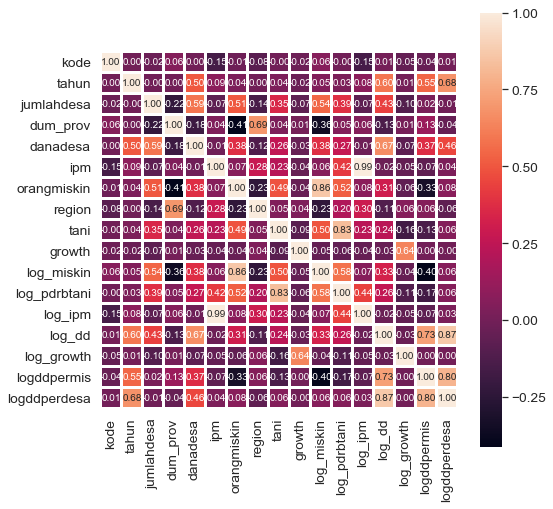

In [63]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.25)
sns.heatmap(da.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

<Figure size 792x792 with 0 Axes>

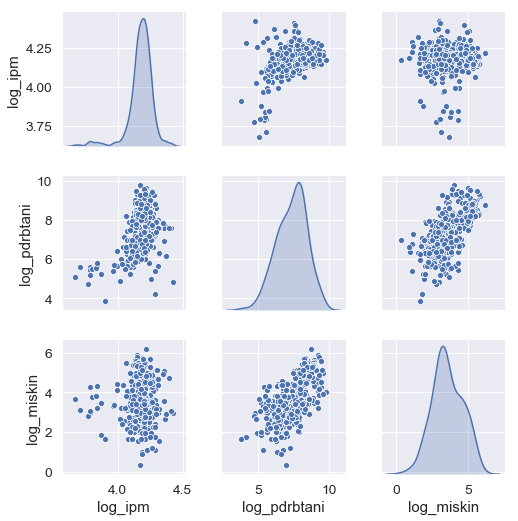

In [64]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2015[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

<Figure size 792x792 with 0 Axes>

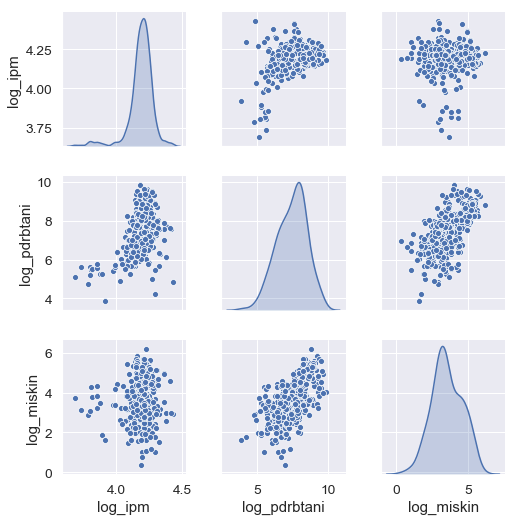

In [65]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2016[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

<Figure size 792x792 with 0 Axes>

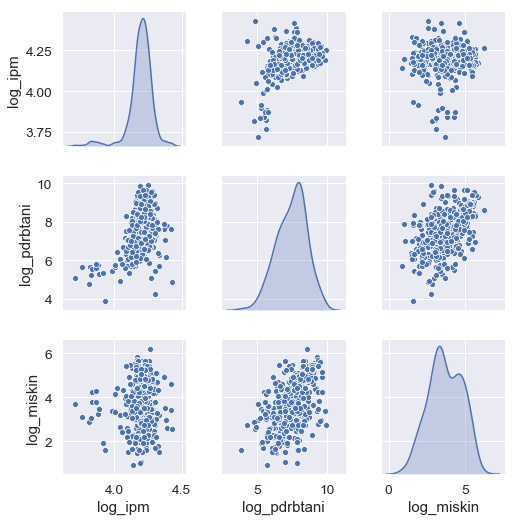

In [66]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2017[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

In [67]:
coba = da[['log_ipm', "log_pdrbtani", "log_miskin", "regional"]]

In [68]:
desa = da[["jumlahdesa", "orangmiskin", "danadesa", "regional"]]

<Figure size 792x792 with 0 Axes>

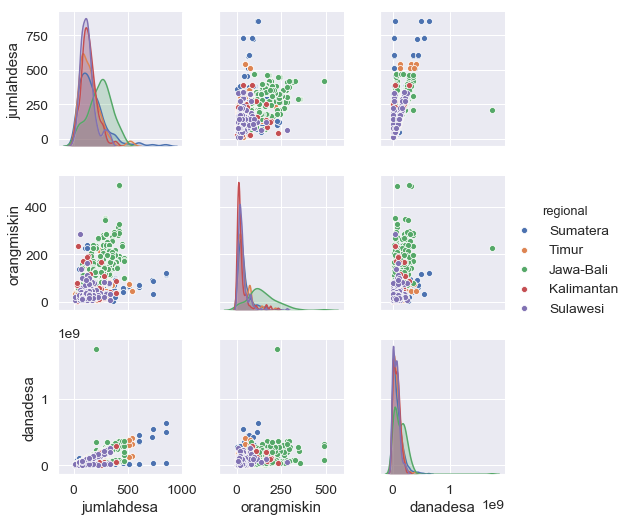

In [69]:
plt.figure(figsize=(11, 11))
sns.pairplot(desa, diag_kind="kde", hue="regional")
plt.show()

<Figure size 792x792 with 0 Axes>

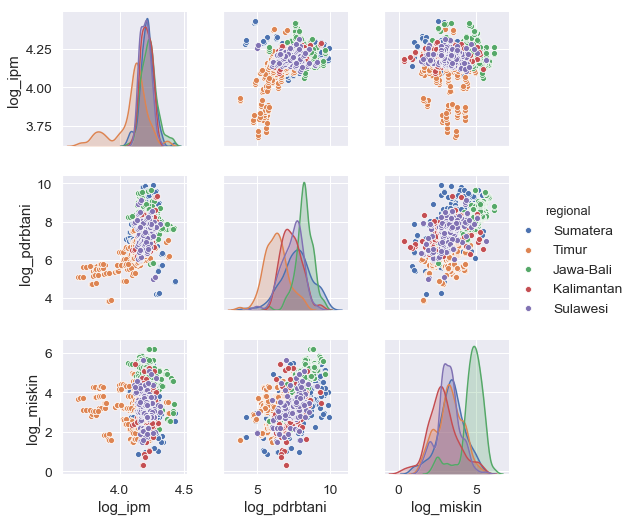

In [70]:
plt.figure(figsize=(11, 11))
sns.pairplot(coba, diag_kind="kde", hue="regional")
plt.show()

<Figure size 936x936 with 0 Axes>

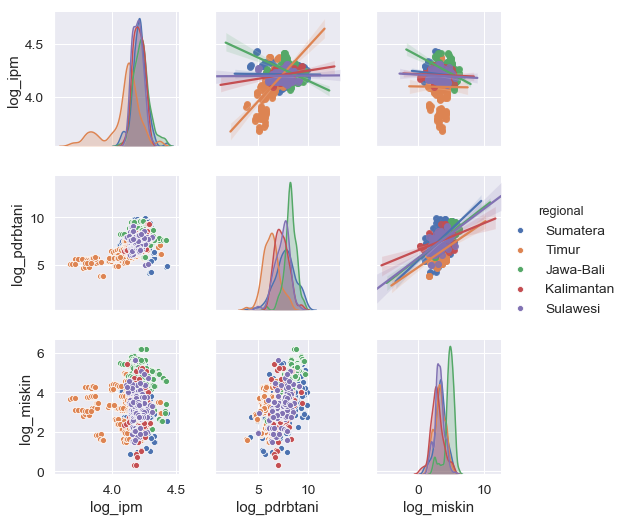

In [71]:
plt.figure(figsize=(13, 13))
e = sns.pairplot(coba, diag_kind="kde", hue="regional")
e.map_upper(sns.regplot)
plt.savefig("lam1.png")
plt.show()

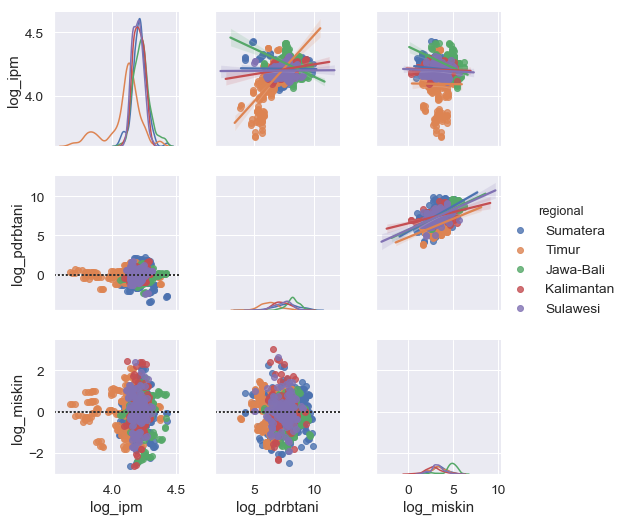

In [72]:
g = sns.PairGrid(coba, hue="regional") 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(sns.kdeplot) 

g.add_legend() 
g.set(alpha=0.5)

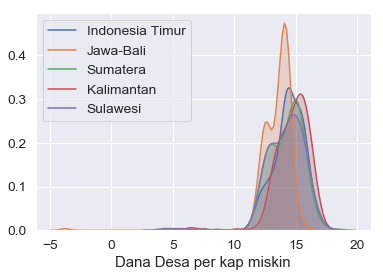

In [73]:
sns.kdeplot(da.logddpermis[da.regional=='Timur'], label='Indonesia Timur', shade=True)
sns.kdeplot(da.logddpermis[da.regional=='Jawa-Bali'], label='Jawa-Bali', shade=True)
sns.kdeplot(da.logddpermis[da.regional=='Sumatera'], label='Sumatera', shade=True)
sns.kdeplot(da.logddpermis[da.regional=='Kalimantan'], label='Kalimantan', shade=True)
sns.kdeplot(da.logddpermis[da.regional=='Sulawesi'], label='Sulawesi', shade=True)
plt.xlabel('Dana Desa per kap miskin');

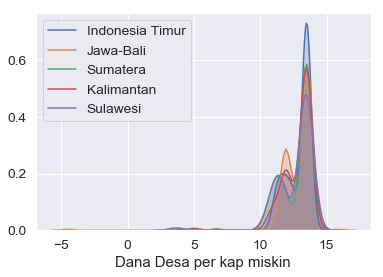

In [74]:
sns.kdeplot(da.logddperdesa[da.regional=='Timur'], label='Indonesia Timur', shade=True)
sns.kdeplot(da.logddperdesa[da.regional=='Jawa-Bali'], label='Jawa-Bali', shade=True)
sns.kdeplot(da.logddperdesa[da.regional=='Sumatera'], label='Sumatera', shade=True)
sns.kdeplot(da.logddperdesa[da.regional=='Kalimantan'], label='Kalimantan', shade=True)
sns.kdeplot(da.logddperdesa[da.regional=='Sulawesi'], label='Sulawesi', shade=True)
plt.xlabel('Dana Desa per kap miskin');

In [77]:
jb = da.loc[da["regional"] == "Jawa-Bali"]
jb.to_csv("Jawa-Bali.csv")
tim = da.loc[da["regional"] == "Timur"]
tim.to_csv("Timur.csv")
suma = da.loc[da["regional"] == "Sumatera"]
suma.to_csv("Sumatera.csv")
kal = da.loc[da["regional"] == "Kalimantan"]
kal.to_csv("Kalimanta.csv")
sul = da.loc[da["regional"] == "Sulawesi"]
sul.to_csv("Sulawesi.csv")